# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.tree import export_graphviz
#import graphviz

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


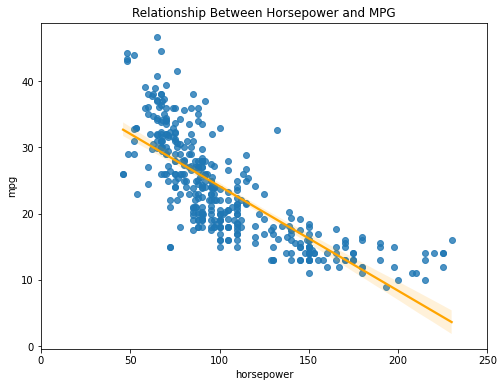

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](images/slope-rss-relationship.png)

#### Answer: 

- This is showing us a gradient descent which is a derivative of a function, it gives us optimal values for linear regression by giving us the best fit line for the slope that minimizes cost/loss the most.


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

- Here it wants us to just visualize gradient descent and how it works, if I had the ability I would have large arrows towards the top pointing down that decrease in size until they reach the bottom of the slope and then git bigger on the upswing

### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?
- A step size is how far the gradient descent goes down, this is just taking big steps at first and as it gets closer to the bottom of the slope it will decrease in size for more accurate predictions. step size too small take too long, step size too large means it may miss our optimal values

#### Answer: 

- 


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

#### Answer: 

- Logistic regression is for classification problems
- logreg will predict 0 and 1 ie True/False
- linreg is for continuous values logreg is for catagorical
- logreg is parametric 


### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

#### Answer: 

- logreg is good for yes or no predictions ie: chance of cancer with certain underlying health features.  A limitation is that it requires labeled data and a vast majority of data in the real world is unlabeled
- easy to interpret 
- fast to compute
- not prone to overfitting

reasons for other models
- target is imbalanced
- if the data is unlabeled or imbalanced another model would be useful


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [5]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [6]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [9]:
# Train-test split
# Set test_size=0.33 and random_state=42
X = mpg_class.drop(columns='target')
y = mpg_class['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state=42)

In [11]:
# Scale the data
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

#### Part 1: explore the target column breakdown in train data

In [15]:
# Code to explore
y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- We have an imbalanced data set with 75% of y data being 0


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- It would predict majority of 0s


#### Part 3: How accurate would that baseline be on test data?


In [16]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

-75% accurate on test 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

#### Answer:

- The data is pretty imbalanced and we would be predicting 0s when they might actually be 1s, you could employ SMOTE here to balance the data more


### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [40]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state=42)
logreg.fit(X_test_scaled, y_test)

LogisticRegression(random_state=42)

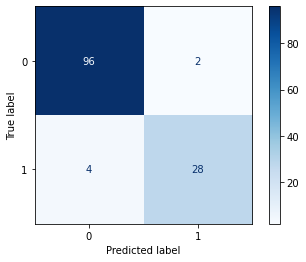

In [42]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test,
                     cmap=plt.cm.Blues)
plt.show()

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [47]:
# Accuracy
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score 

y_hat_train = logreg.predict(X_train_scaled)
y_hat_test =logreg.predict(X_test_scaled)


print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('\n')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('\n')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('\n')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.8732394366197183
Testing Precision:  0.9333333333333333


Training Recall:  0.9253731343283582
Testing Recall:  0.875


Training Accuracy:  0.9465648854961832
Testing Accuracy:  0.9538461538461539


Training F1-Score:  0.8985507246376812
Testing F1-Score:  0.9032258064516129


### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [27]:
# Calculate roc-auc
test_probas = logreg.predict_proba(X_test_scaled)[:,1]

roc_auc_score(y_test, test_probas)

0.9811862244897959

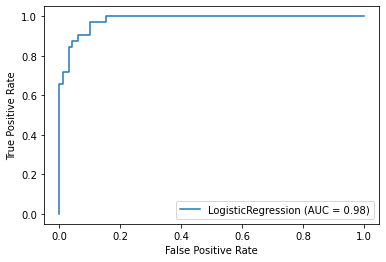

In [28]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test);

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

#### Answer:

- Our model is doing well 


## Part 4: Decision Trees

### Set Up

Let's try a decision tree classifier. 

First, let's just have the tree split once, using just a single column. How would you set that up? Use random_state = 42.

In [31]:
# Create two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Train the two trees on different columns

# First fit dt_maxdepth1_v1 on 'weight', set it equal to dt_weight
dt_weight = dt_maxdepth1_v1.fit(X_train[['weight']], y_train)

# Then fit dt_maxdepth1_v2 on 'origin', set it equal to dt_origin
dt_origin = dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

#### Images:

Here we've created two images of what the nodes should look like.

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](images/dt-maxdepth1-v2.png) |

### 13) Just looking at the images, which of these trees does a better job splitting the data? How can you tell?

#### Answer:

- I would say version 1 is doing  best it seems to have split the data into better defined groups


In [33]:
# If you want to check on your answer, let's try out just the default .score() for the models here.
print(dt_weight.score(X_test[['weight']], y_test))

print(dt_origin.score(X_test[['origin']], y_test))

0.9307692307692308
0.7538461538461538


### 13 bonus) What's the default scoring metric for the sklearn DecisionTreeClassifier? Is it always the best metric to use?

#### Answer:

- default is accuracy scoring, it is not always best to use

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [48]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
#dont scale decision because it is not distance based
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

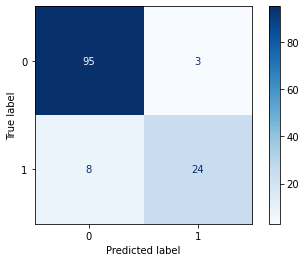

In [49]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt, X_test, y_test,
                     cmap=plt.cm.Blues)
plt.show()

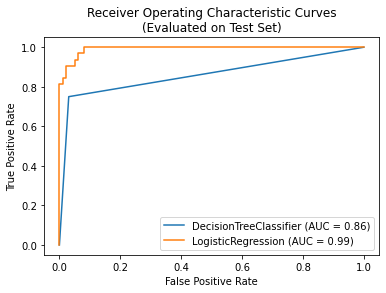

In [50]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

#### Answer:

- The LogisticRegression should be best as it has a higher ROC/AUC score
